##SEMANA 3 -ACTIVIDAD 1

#Datos generales:
* Nombre: Andrés Julián López Hurtado
* Matrúicula: A01793899
* Materia: Ciencia y analítica de datos
* Profesor:Jobish Vallikavungal
* Fecha: 04/10/2022

##Parte 1: Fundamentos de bases de datos##

1. Fundamentos de bases de datos y para ciencia de datos. 

>>Una base de datos es una colección organizada de datos que están interrelacionados que puede ser almacenada, accedida y procesada. Se pueden encontrar en forma no estructurada o estructurada. No estructurados pueden ser texto, imágenes, sonidos. En la forma estructurada la información está organizada en forma tabulada y es posible relacionarla con otras tablas mediante el establecimiento de relaciones y con definiciones de la forma como estos datos están relacionados. Se pueden usar distintos lenguajes de consulta, dentro de los cuales está SQL (simplified query lenguaje).

>>El software diseñado para realizar operaciones sobre las bases de datos relacionales es el RDBMS (relational database management system). Tales operaciones pueden ser crear, modificar, definir relaciones entre tablas y consultar bases de datos. 

>>La relación entre bases de datos está basada en la teoría relacional de bases de datos. Cada entrada de una base de datos es una tupla con datos de todos los valores de los atributos tabulados en la tabla. Se refiere a la fila como registro también. Entonces, cada COLUMNA de la tabla es un ATRIBUTO o un CAMPO (field), y cada fila es la tupla con los valores de los atributos. Cada columna está identificada por el título del ATRIBUTO y cada fila se identifica en forma única por una llave única (unique key). La intersección de un atributo con la llave única genera las celdas.

>>Recordando que una llave primaria (primary key) es un identificador único para cada registro (fila) de una tabla, se le llama llave extranjera (foreing key) a la referenciación de la llave primaria en cualquier otra tabla.

2. Fundamentos de almacenes de datos (Data Warehouse) para ciencia de datos.

>>Definición: Un almacén de datos es una base de datos gigante que proviene de muchas fuentes y se encarga de relacionarlos para el usuario. Es posible consultar la infprmación a través del lenguaje simplificado de consultas (SQL).

>>Desafíos: normalización, se refiere a encontrar formas en que los datos de las difentes fuentes se relacionan entre sí, si los datos son comparables entre ellos, si los datos de una base se pueden comparar correctamente con otra, cómo se maneja la falta de información o datos corruptos. Otro desafío son las transformaciones, las cuales ocurren cuando se debe tomar una información de una base de datos para agregarla a otra. De ahí sale el concepto de ETL y ELT.

>> Formas de transformaciones: 
* **Forma convencional ETL** (extract, transform, load // extraer, transformar, cargar). La idea es extraer inicialmente la información de alguna fuente y luego organizar dicha información en forma tabulada y ordenada, para luego cargarla en la base de datos que esté trabajando. Aquí uso los recursos locales para hacer la transformación para luego cargarla a mi base de datos. Fue la forma en que se hacía esta actividad inicialmente.
* **ELT** (extract, load and transform): La idea es pirmero extraer las bases de datos para luego insertarlas directo en repositorios en línea de bases de datos. Un ejemplo es el cluster Hadopp. Usando las capacidad de estos repositorios y los prorgamas de consulta y transformación como MapTransform o Spark), puedo hacer la transformación de dichos datos en línea (y en diferentes ordenadores) para que una vez esté lista pueda descargar la información estructurada en mi base de datos. 

La gran diferencia aquí es que en ETL uso una base de datos monolítica para transformar y cargar datos, mientras que ELT usa las bases de datos fragmentadas distribuídas en clusters para ser transforadas y consultadas.



In [ ]:
#Primero voy a indicarle al programa la ruta donde está la base de datos
ruta = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
#Voy a importar las librerías que voy a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#1. Voy a leer el archivo csv. El archivo contiene 25 columnas

df = pd.read_csv(ruta)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
#Hay que revisar datos perdidos. El código arroja True, lo que significa que en efecto hay instancias perdidas.
df.isnull().values.any()

True

In [ ]:
#Luego voy a mirar cuáles de las columnas tienen datos perdidos. Hay datos perdidos en las columnas desde X2 hasta X23 y también en la variable de salida
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

###Parte 1. Tratamiento de los datos vacíos

In [ ]:
#Primero voy a crear una copia de mi base original para poder mantener íntegros los datos originales:
ndf = df.copy()

In [ ]:
#2. La primera técnica que voy a utilizar es eliminar las filas donde no tengo ningún valor. Estoy simplemente eliminando las filas con información
#que no me va a aportar nada. El resultado es un arreglo de 30.000 filas, por lo que todos los datos tienen al menos un valor.

ndf.dropna(how = "all", inplace = True)
ndf.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#3. Para el caso de historial de pagos (filas x6 a la X11), valores de facturas (x12 a x17) y valores pagados anteriormente (x18 a x23)
# voy a eliminar aquellas filas donde al menos falten un valor. 
#La idea es que cuente sólo con las filas donde tenga datos en el historial de pagos

ndf.dropna( subset = ["X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15",  
                      "X16",  "X17", "X18", "X19", "X20", "X21", "X22", "X23"], inplace = True)
ndf

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
ndf.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5      True
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

La anterior comprobación me muestra que solamente en X5, la edad del tomador del préstamo, quedó con valores nulos. Ahora voy a utilizar el valor del promedio de la edad para llenar ese valor

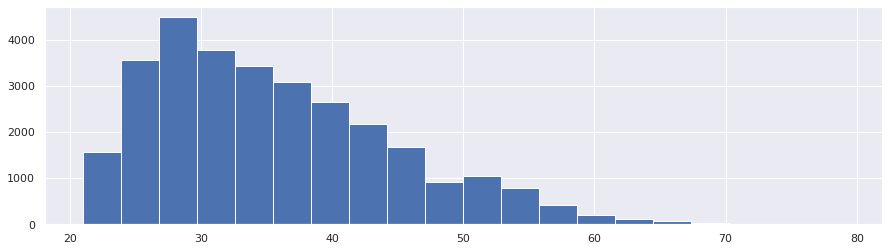

In [ ]:
#4. Para el caso de las edades, X5, voy a analizar primero la distribución de edades. En el gráfico se observa que no es una distribución normal,
#por lo que voy a usar la moda de las edades.

sns.set(rc={'figure.figsize':(15,4)})

plt.hist(ndf["X5"], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.


plt.show()


In [ ]:
moda_edad = ndf.X5.mode()[0]
moda_edad

29.0

In [ ]:
#Ahora voy a reemplazar los valores NaN de X5 con la moda.
ndf.X5.fillna(ndf.X5.mode()[0], inplace=True)


In [ ]:
#Voy a hacer una comprobación final para ver si tengo alguna variable aún con valores NaN

ndf.isnull().values.any()

False

##Parte 3: Selección y limpieza de bases de datos##
Con base en los resultados de tu libreta de Google Colab de la Parte 2 responde detalladamente las siguientes preguntas: 

1. ¿Qué datos considero mas importantes? ¿Por qué?

>He considerado importantes inicialmente los datos que caractarizan a las personas: su género, educación, estado marital y edad. Estos datos van a incidir directamente en la capacidad de pagar sus créditos. En el caso del nivel de educación, se supone que cuanto mayor sea el nivel educativo tendrán un empleo mejor remunerado y por tanto tendrán capacidad de pagar sus deudas. Un análisis similiar aplica para las demás características.

>También consideré importante la información de pagos, pues en alguna forma una medida de la disciplina para el pago de sus deudas e incide directamente en la probabilidad de no pagar.

2. ¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?
>Para mi caso particular he decido  utilizar las dos técnicas:

>>Para el caso de la información de pagos, he decidido eliminar los registros donde falte alguna información del historial de pagos. La idea es contar con registros donde se tenga toda la información de los pagos. Dos comentarios sobre este tratamiento:
>El resultado fue que de 30.000 registros bajé a 29.961 registros. Son sólo 31 registros los que se eliminaron de la base inicial. Esto es apenas 0.13% de la base y considero que es aceptable. Aún tengo bastantes datos para entrenar el modelo.

>El siguiente paso para el tratamiento de la base sería entender qué hacer cuando tengo valores en 0, sobre todo para el historial de pagos. Pienso que una buena alternativa sería dejar aquellos registros con máximo un valor en cero por fila en las variables x6 a x11 (historial de pagos) y posteriormente usar la mediana para llenar este valor. La idea sería no meterle al modelo este ruido. Ya cuando se tienen dos ceros en el historial de pagos me parece ya inapropiado usar alguna técnica para reemplazar el cero pues estoy estimando con menos datos disponibles.

3. ¿Es necesario ordenar los datos para el análisis? Sí / No / ¿Por qué?
>xPara este caso no tuve que ordenar los datos. Los atributos y métodos utilizados no requieren que los datos estén organizados. 

4. ¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.
>Cuando hice el análisis de la base, me dí cuenta que los datos no tenían errores de formato que impideran usar los métodos de limpieza. Pude comprobar también con estadística descriptiva que todos los valores de la tabla son numéricos por lo que no habría problemas de formato.

5. ¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
>Para mi caso particulart utilicé dos métodos de limpieza de datos:

> Eliminación de los registros nulos para las columnas que indican pagos: historial, nivel de pagos, valores de facturas. Usé el médoto Dropna indicando las columnas a considerar en el análisis con el argumento subset.

>Modificación de registros: Se dió la casualidad que al eliminar los valores NaN con el método explicado anteriormente, la única variable que quedó con valores nulos fue la edad, X5. Para este caso decidí analizar la distribución de las edades y usar la mediana al darme cuenta que no es una distribución uniformemente distribuida al rededor de la media.
